In [1]:
import magritte.core  as magritte             # Core functionality
import numpy as np
import os
import yt
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='serif')

from scipy.spatial import Delaunay, cKDTree   # Finding neighbors

In [2]:
wdir = "/lhome/thomasc/Magritte-examples/Magritte3paper/Phantom_3D/"
J_file_original = os.path.join(wdir, 'J_original.npy')
J_file_haar = os.path.join(wdir, 'J_haar.npy')
J_file_gmsh = os.path.join(wdir, 'J_gmsh.npy')
J_file_rec = os.path.join(wdir, 'J_rec.npy')
model_file_haar = os.path.join(wdir, 'wind_red_haar.hdf5')   # reduced 3D Phantom Magritte model
model_file_gmsh = os.path.join(wdir, 'wind_red_gmsh.hdf5')   # reduced 3D Phantom Magritte model
model_file_rec = os.path.join(wdir, 'wind_red_rec.hdf5')   # reduced 3D Phantom Magritte model
model_file_original = os.path.join(wdir, 'model_Phantom_3D.hdf5')   # original 3D Phantom Magritte model

Loading the different saved J's for comparing them

In [3]:
J_haar = np.load(J_file_haar)[:,0]
J_gmsh = np.load(J_file_gmsh)[:,0]
J_rec = np.load(J_file_rec)[:,0]
J_original = np.load(J_file_original)[:,0]

In [4]:
print(J_haar.shape)
print(J_gmsh.shape)
print(J_rec.shape)
print(J_original.shape)

(88615,)
(91960,)
(88846,)
(1138669,)


Load all models again in order to obtain the corresponding grids.

In [5]:
model_haar = magritte.Model(model_file_haar)
model_gmsh = magritte.Model(model_file_gmsh)
model_rec = magritte.Model(model_file_rec)
model_original = magritte.Model(model_file_original)

                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = /lhome/thomasc/Magritte-examples/Magritte3paper/Phantom_3D/wind_red_haar.hdf5
-------------------------------------------
Reading parameters...
Reading points...
Reading rays...
Reading boundary...
Reading chemistry...
Reading species...
Reading thermodynamics...
Reading temperature...
Reading turbulence...
Reading lines...
Reading lineProducingSpecies...
Reading linedata...
read num 1
read sym CO
nlev = 41
nrad = 1
Reading collisionPartner...
Reading collisionPartner...
Reading quadrature...
Reading radiation...
Reading frequencies...
Not using scattering!
                                           
-------------------------------------------
  Model read, parameters:                  
-------------------------------------------
  npoints    = 88615
  nrays      = 108
  nboundary  = 985
  nfreqs   

Obtain delaunay triangulations (might take a few minutes for the original grid)

In [6]:
position_haar = np.array(model_haar.geometry.points.position)
position_gmsh = np.array(model_gmsh.geometry.points.position)
position_rec = np.array(model_rec.geometry.points.position)
position_original = np.array(model_original.geometry.points.position)
delaunay_haar = Delaunay(position_haar)
delaunay_gmsh = Delaunay(position_gmsh)
delaunay_rec = Delaunay(position_rec)
delaunay_original = Delaunay(position_original)

Plot all computed J's

In [7]:
ds_haar = yt.load_unstructured_mesh(
    connectivity = delaunay_haar.simplices.astype(np.int64),
    coordinates  = delaunay_haar.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_haar[delaunay_haar.simplices].astype(np.float64)}
)

yt : [INFO     ] 2023-03-07 15:44:15,473 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:15,480 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:15,487 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:15,494 Parameters: domain_right_edge         = [3.22233049e+15 3.28144691e+15 3.28662933e+15]
yt : [INFO     ] 2023-03-07 15:44:15,495 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2023-03-07 15:44:15,666 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-03-07 15:44:15,666 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-03-07 15:44:15,667 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-03-07 15:44:15,667 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-03-07 15:44:15,676 Making a fixed resolution buffer of (('connect1', 'J')) 800 by 800



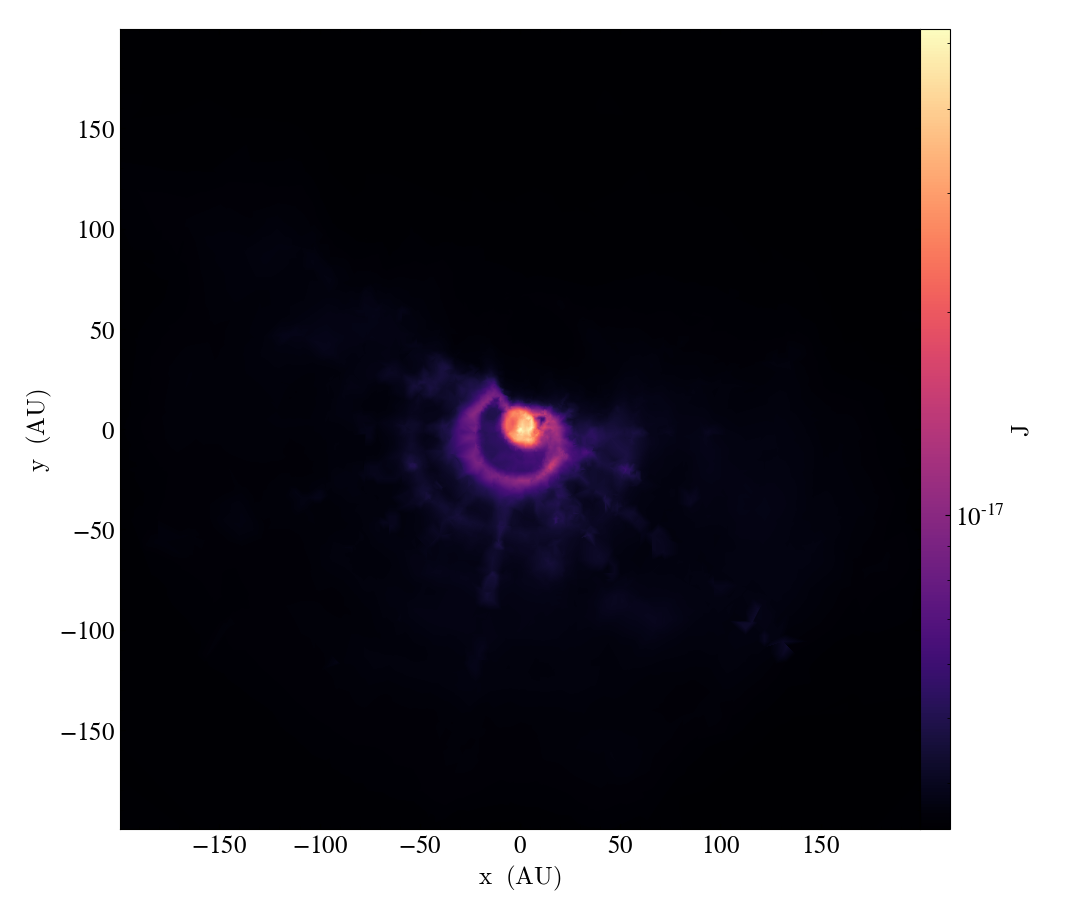

In [8]:
sl = yt.SlicePlot (ds_haar, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
#sl.set_zlim(('connect1', 'n'), zmin=(1e+6, "1"), zmax=(1e+12, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:16,806 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:16,814 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:16,822 Parameters: domain_left_edge          = [-3.11073526e+15 -3.11073526e+15 -3.11073526e+15]
yt : [INFO     ] 2023-03-07 15:44:16,829 Parameters: domain_right_edge         = [3.11073526e+15 3.11073526e+15 3.11073526e+15]
yt : [INFO     ] 2023-03-07 15:44:16,829 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:16,984 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:16,985 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:16,985 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:16,985 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:16,993 Making a fixed resolution buffer of (('connect1', 'J'))


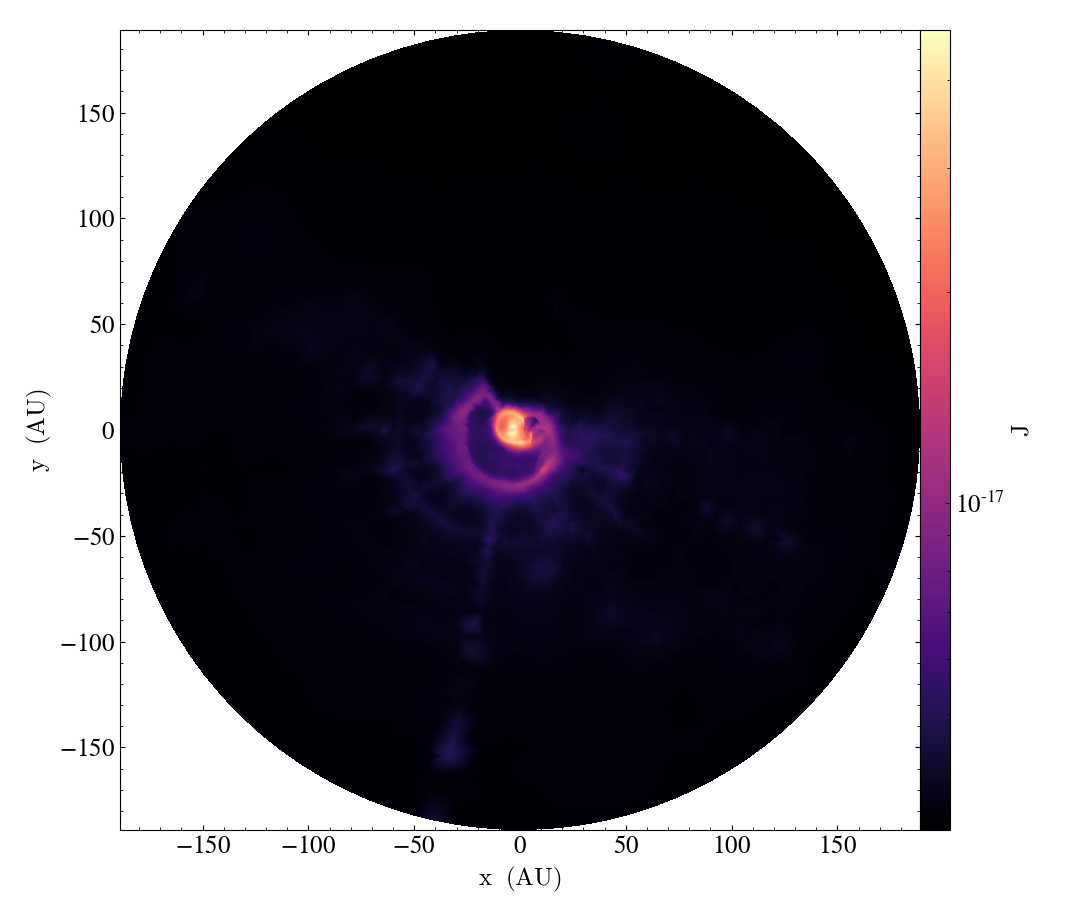

In [9]:
ds_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_gmsh.simplices.astype(np.int64),
    coordinates  = delaunay_gmsh.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_gmsh[delaunay_gmsh.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_gmsh, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
#sl.set_zlim(('connect1', 'n'), zmin=(1e+6, "1"), zmax=(1e+12, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:17,738 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:17,745 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:17,753 Parameters: domain_left_edge          = [-3.35164636e+15 -3.29150911e+15 -3.29102752e+15]
yt : [INFO     ] 2023-03-07 15:44:17,760 Parameters: domain_right_edge         = [3.22889148e+15 3.28800688e+15 3.29319400e+15]
yt : [INFO     ] 2023-03-07 15:44:17,760 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:17,915 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-03-07 15:44:17,916 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-03-07 15:44:17,916 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-03-07 15:44:17,916 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-03-07 15:44:17,925 Making a fixed resolution buffer of (('connect1', 'J'))


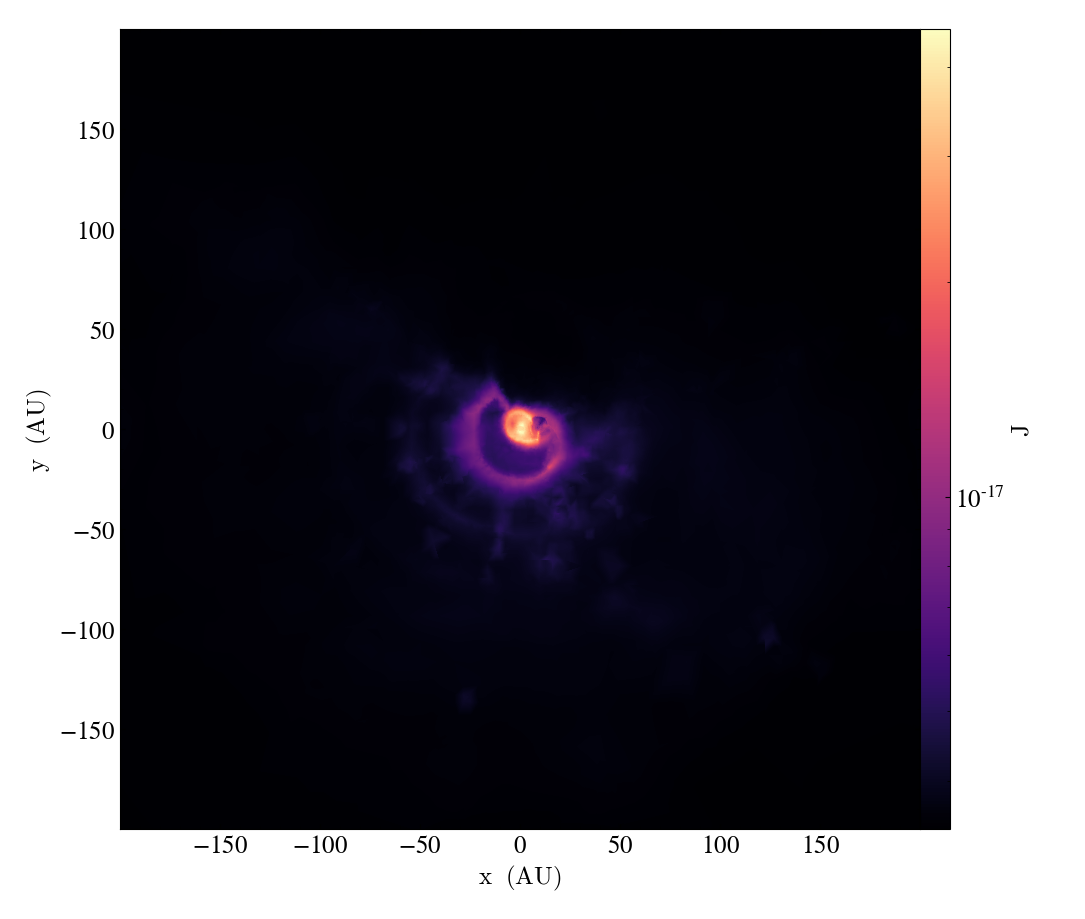

In [10]:
ds_rec = yt.load_unstructured_mesh(
    connectivity = delaunay_rec.simplices.astype(np.int64),
    coordinates  = delaunay_rec.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_rec[delaunay_rec.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_rec, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
#sl.set_zlim(('connect1', 'n'), zmin=(1e+6, "1"), zmax=(1e+12, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:18,779 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:18,786 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:18,794 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:18,801 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-03-07 15:44:18,802 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:19,210 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:19,211 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:19,211 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:19,211 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:19,219 Making a fixed resolution buffer of (('connect1', 'J'))


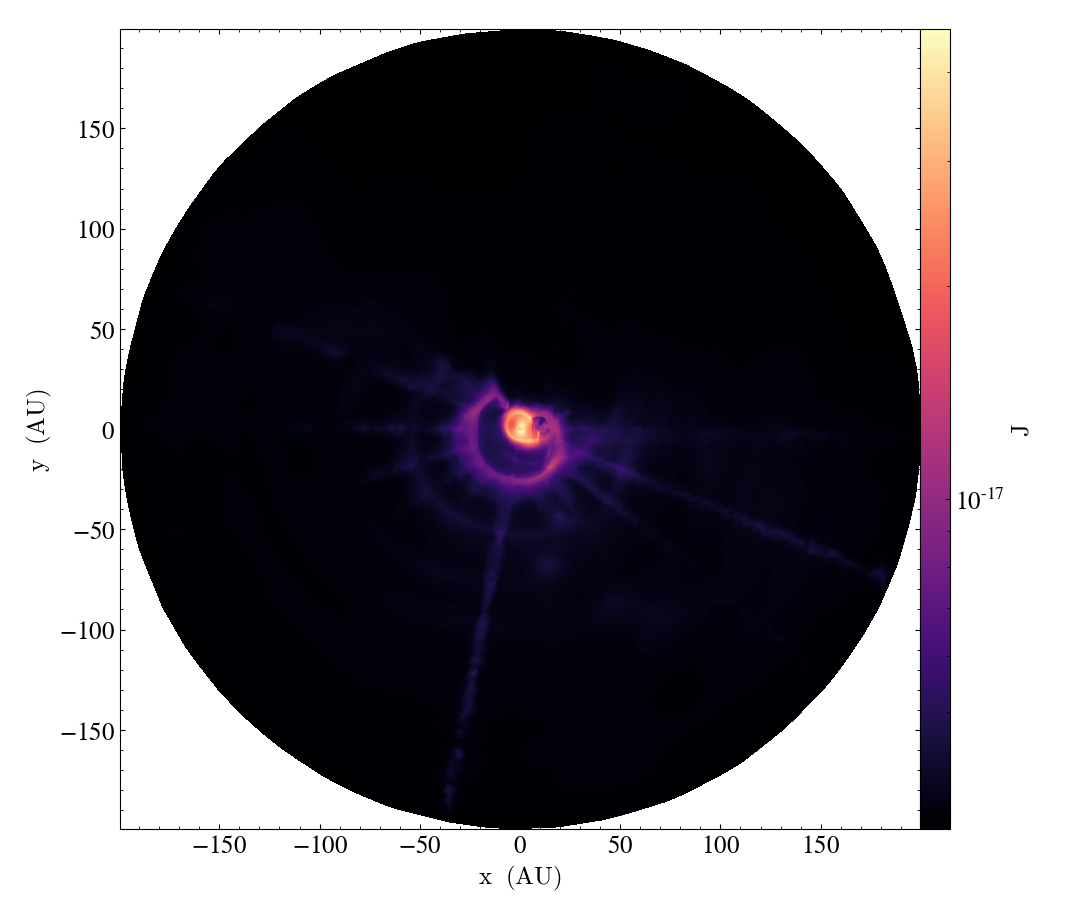

In [11]:
ds_original = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_original[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_original, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
#sl.set_zlim(('connect1', 'n'), zmin=(1e+6, "1"), zmax=(1e+12, "1"))
sl.zoom           (1.1)

Project reduced computed data onto original data

In [12]:
# Find closest points
corresp_points_gmsh = cKDTree(position_original).query(position_gmsh)[1]
corresp_points_haar = cKDTree(position_original).query(position_haar)[1]
corresp_points_rec = cKDTree(position_original).query(position_rec)[1]

#and do lazy projection onto reduced grids
prj_J_original_gmsh = J_original[corresp_points_gmsh]
prj_J_original_haar = J_original[corresp_points_haar]
prj_J_original_rec = J_original[corresp_points_rec]

rel_diff_gmsh = 1.0/2.0*np.abs(prj_J_original_gmsh-J_gmsh)/(prj_J_original_gmsh+J_gmsh)
rel_diff_haar = 1.0/2.0*np.abs(prj_J_original_haar-J_haar)/(prj_J_original_haar+J_haar)
rel_diff_rec = 1.0/2.0*np.abs(prj_J_original_rec-J_rec)/(prj_J_original_rec+J_rec)

In [13]:
print(prj_J_original_gmsh.shape)
print(prj_J_original_haar.shape)
print(prj_J_original_rec.shape)

(91960,)
(88615,)
(88846,)


Plot the relative differences (I expect the largest differences to reside in the middle)

yt : [INFO     ] 2023-03-07 15:44:22,447 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:22,455 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:22,462 Parameters: domain_left_edge          = [-3.11073526e+15 -3.11073526e+15 -3.11073526e+15]
yt : [INFO     ] 2023-03-07 15:44:22,469 Parameters: domain_right_edge         = [3.11073526e+15 3.11073526e+15 3.11073526e+15]
yt : [INFO     ] 2023-03-07 15:44:22,469 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:22,679 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:22,680 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:22,680 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:22,680 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-03-07 15:44:22,688 Making a fixed resolution buffer of (('connect1', 'J_re


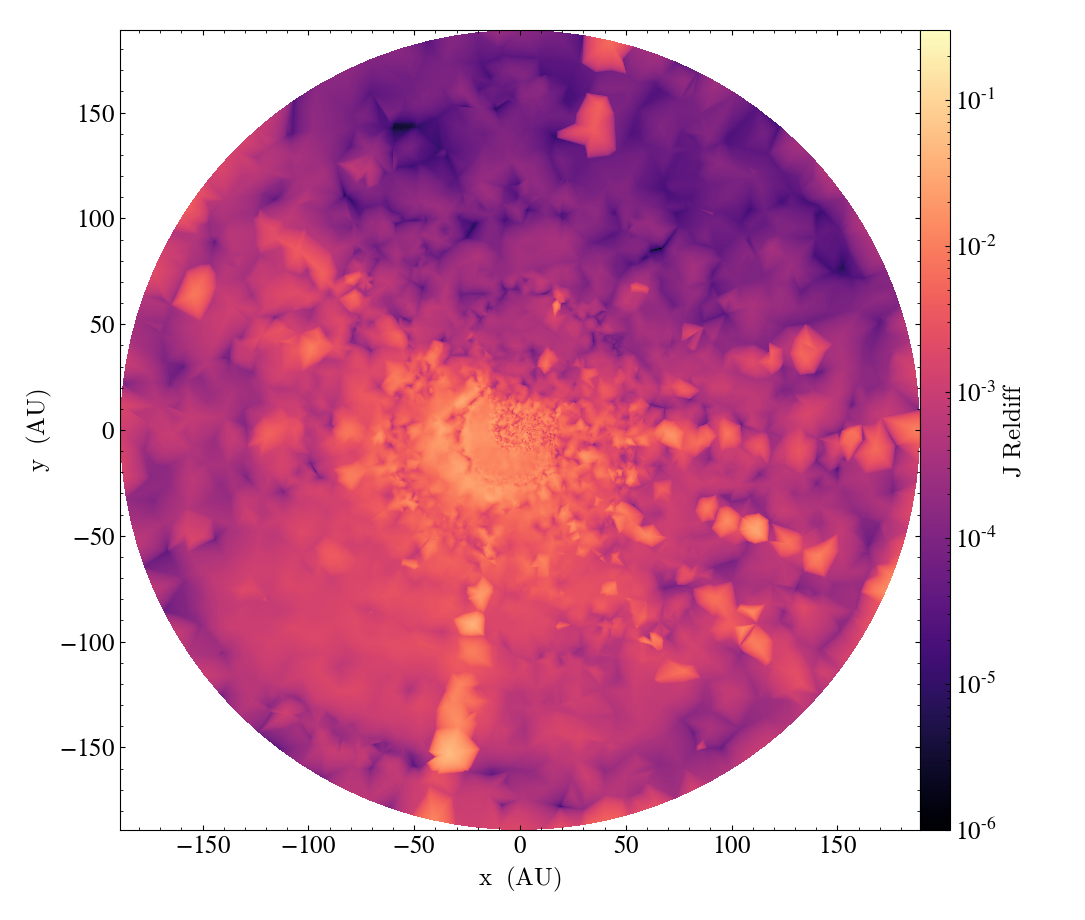

In [14]:
#gmsh
diff_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_gmsh.simplices.astype(np.int64),
    coordinates  = delaunay_gmsh.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): rel_diff_gmsh[delaunay_gmsh.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (diff_gmsh, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(3e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:23,512 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:23,519 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:23,526 Parameters: domain_left_edge          = [-3.35164636e+15 -3.29150911e+15 -3.29102752e+15]
yt : [INFO     ] 2023-03-07 15:44:23,534 Parameters: domain_right_edge         = [3.22889148e+15 3.28800688e+15 3.29319400e+15]
yt : [INFO     ] 2023-03-07 15:44:23,534 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:23,681 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-03-07 15:44:23,681 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-03-07 15:44:23,682 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-03-07 15:44:23,682 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-03-07 15:44:23,690 Making a fixed resolution buffer of (('connect1', 'J_re


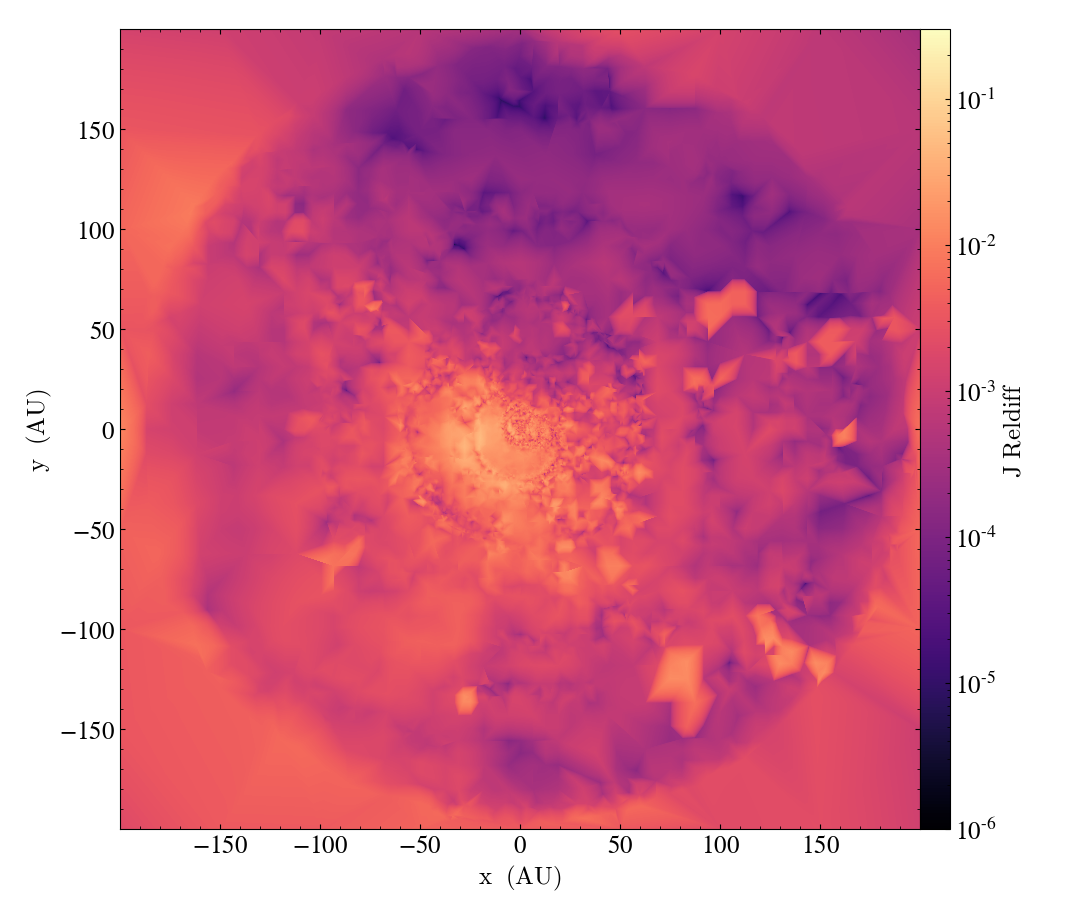

In [15]:
#recursive
diff_rec = yt.load_unstructured_mesh(
    connectivity = delaunay_rec.simplices.astype(np.int64),
    coordinates  = delaunay_rec.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): rel_diff_rec[delaunay_rec.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (diff_rec, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(3e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:24,491 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:24,498 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:24,506 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:24,513 Parameters: domain_right_edge         = [3.22233049e+15 3.28144691e+15 3.28662933e+15]
yt : [INFO     ] 2023-03-07 15:44:24,513 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:24,662 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-03-07 15:44:24,663 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-03-07 15:44:24,663 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-03-07 15:44:24,663 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-03-07 15:44:24,671 Making a fixed resolution buffer of (('connect1', 'J_re


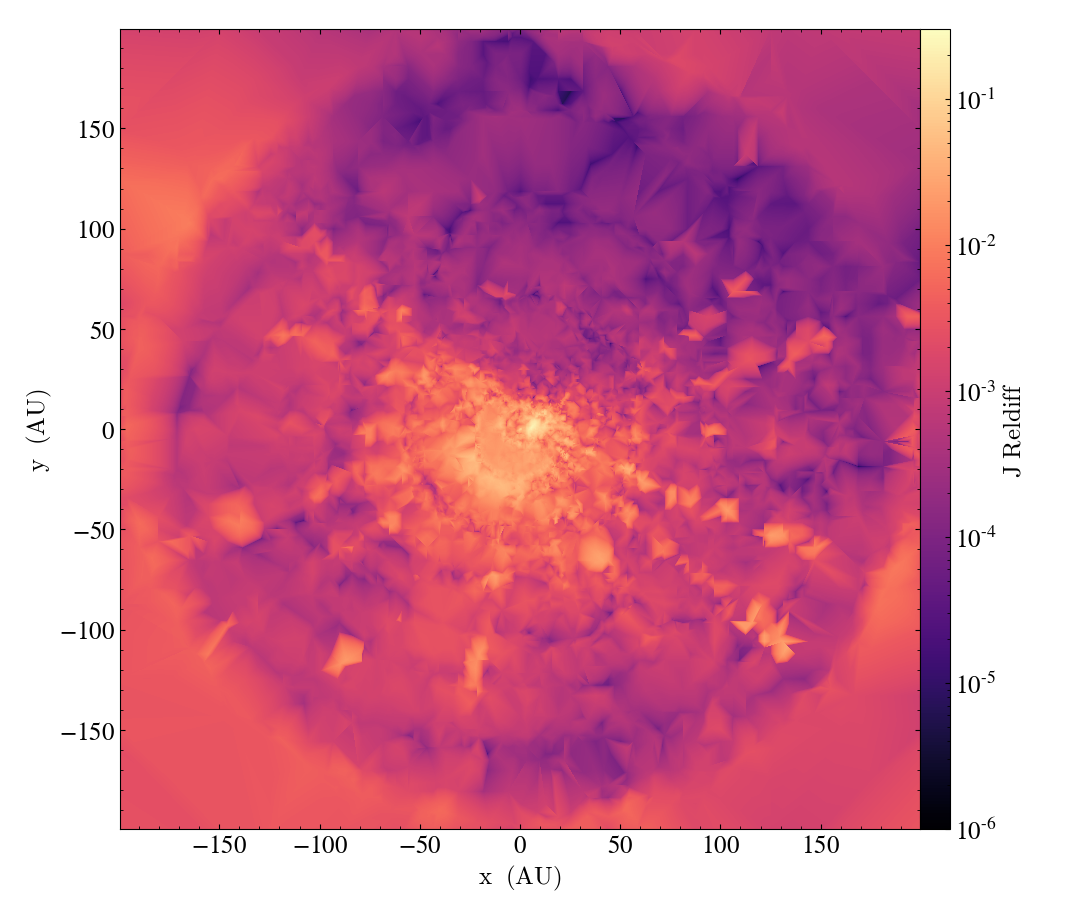

In [16]:
#haar
diff_haar = yt.load_unstructured_mesh(
    connectivity = delaunay_haar.simplices.astype(np.int64),
    coordinates  = delaunay_haar.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): rel_diff_haar[delaunay_haar.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (diff_haar, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(3e-1, "1"))
sl.zoom           (1.1)

Because a figure might not tell us everything, we also plot a CDF of the relative errors.
In this, we notice that some differences exist in the slopes; gmsh might do better for the smaller scale structures, while ... err, this might be incorrect; we might just need to compare on the correct grid (original grid).

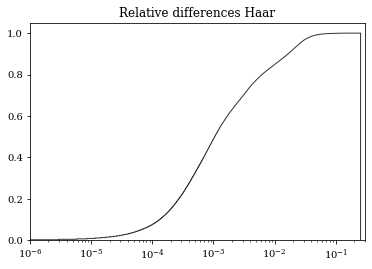

In [17]:
plt.figure()
plt.hist(rel_diff_haar, cumulative=True, label='Haar', density=True,
         bins=len(rel_diff_haar), histtype='step', alpha=0.8, color='k')
plt.xscale('log')
plt.xlim(1e-6,3e-1)
plt.title("Relative differences Haar")
plt.show()

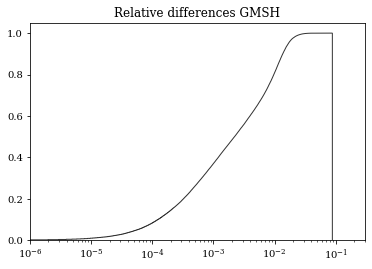

In [18]:
plt.figure()
plt.hist(rel_diff_gmsh, cumulative=True, label='GMSH', density=True,
         bins = len(rel_diff_gmsh), histtype='step', alpha=0.8, color='k')
plt.xscale('log')
plt.xlim(1e-6,3e-1)
plt.title("Relative differences GMSH")
plt.show()

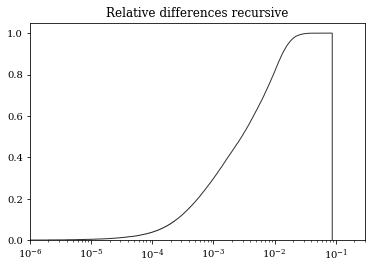

In [19]:
plt.figure()
plt.hist(rel_diff_rec, cumulative=True, label='Rec', density=True,
         bins = len(rel_diff_rec), histtype='step', alpha=0.8, color='k')
plt.xscale('log')
plt.xlim(1e-6,3e-1)
plt.title("Relative differences recursive")
plt.show()

Err, we might just plot them together

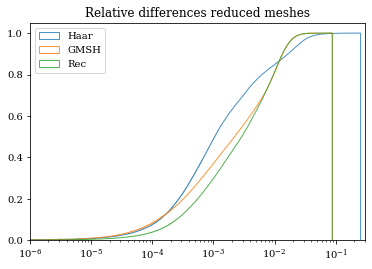

In [20]:
plt.figure()
plt.hist(rel_diff_haar, cumulative=True, label='Haar', density=True,
         bins=len(rel_diff_haar), histtype='step', alpha=0.8)
plt.hist(rel_diff_gmsh, cumulative=True, label='GMSH', density=True,
         bins = len(rel_diff_gmsh), histtype='step', alpha=0.8)
plt.hist(rel_diff_rec, cumulative=True, label='Rec', density=True,
         bins = len(rel_diff_rec), histtype='step', alpha=0.8)
plt.xscale('log')
plt.xlim(1e-6,3e-1)
plt.legend(loc = "upper left")
plt.title("Relative differences reduced meshes")
plt.show()

However, this comparison is not correct. We instead need to interpolate the results onto the original grid.

In [21]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
# interp_func_J_gmsh = LinearNDInterpolator (position_gmsh, J_gmsh)
# interp_func_J_haar = LinearNDInterpolator (position_haar, J_haar)

#nearest neighbor interpolation, as the linear does not seem to work for the haar mesh...
interp_func_J_gmsh = NearestNDInterpolator (position_gmsh, J_gmsh)
interp_func_J_haar = NearestNDInterpolator (position_haar, J_haar)
interp_func_J_rec = NearestNDInterpolator (position_rec, J_rec)

# prj_J_gmsh_original = interp_func_J_gmsh(position_original)
# prj_J_haar_original = interp_func_J_haar(position_original)

In [22]:
prj_J_haar_original = interp_func_J_haar(position_original)

In [23]:
prj_J_gmsh_original = interp_func_J_gmsh(position_original)

In [24]:
prj_J_rec_original = interp_func_J_rec(position_original)

In [25]:
print(prj_J_gmsh_original.shape)
reldiff_gmsh_original_grid = 1.0/2.0*np.abs(prj_J_gmsh_original-J_original)/(prj_J_gmsh_original+J_original)
reldiff_haar_original_grid = 1.0/2.0*np.abs(prj_J_haar_original-J_original)/(prj_J_haar_original+J_original)
reldiff_rec_original_grid = 1.0/2.0*np.abs(prj_J_rec_original-J_original)/(prj_J_rec_original+J_original)

(1138669,)


yt : [INFO     ] 2023-03-07 15:44:29,193 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:29,201 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:29,207 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:29,215 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-03-07 15:44:29,215 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:29,607 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:29,608 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:29,608 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:29,608 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:29,616 Making a fixed resolution buffer of (('connect1', 'J_re


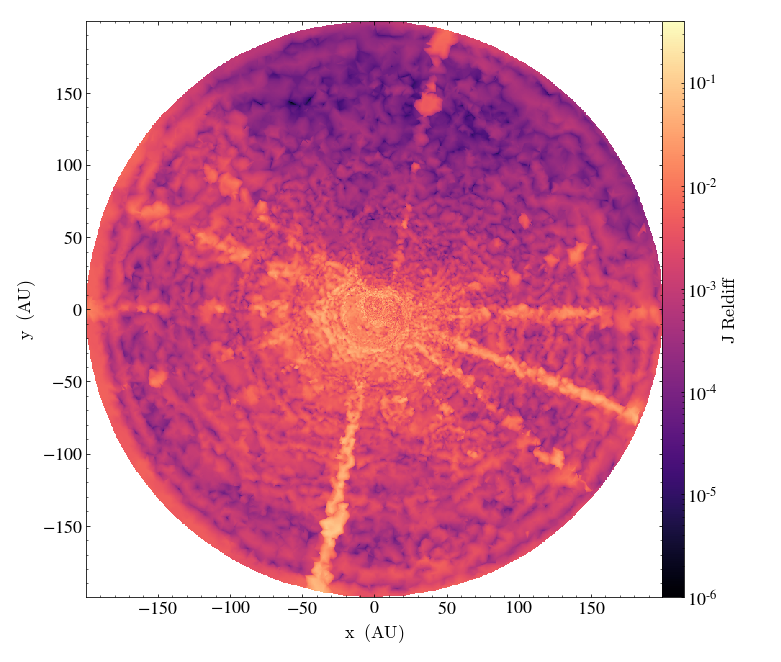

In [26]:
reldiff_original_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_gmsh_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_gmsh, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:32,349 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:32,356 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:32,364 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:32,371 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-03-07 15:44:32,372 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:32,771 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:32,772 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:32,772 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:32,773 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:32,781 Making a fixed resolution buffer of (('connect1', 'J_re


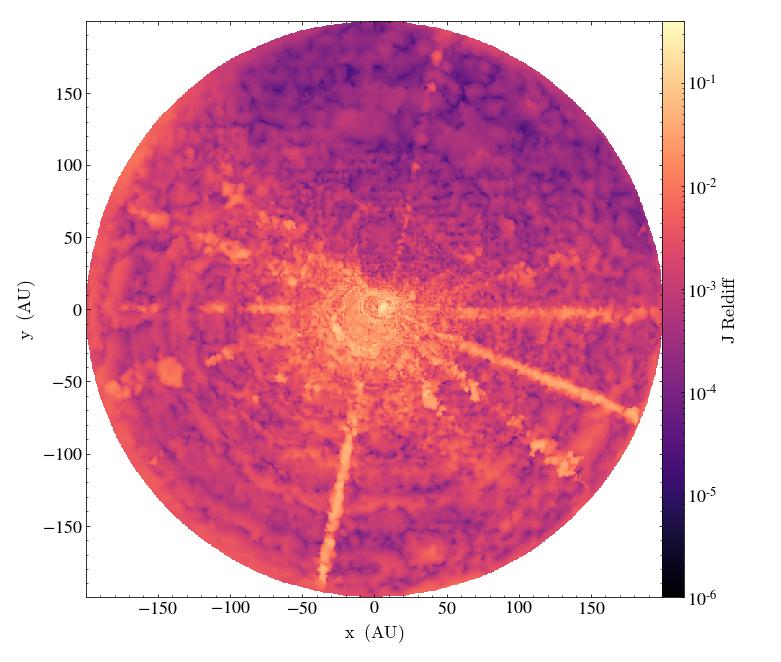

In [27]:
reldiff_original_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_haar_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_gmsh, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-03-07 15:44:36,341 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-07 15:44:36,348 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-07 15:44:36,356 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-03-07 15:44:36,363 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-03-07 15:44:36,363 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-07 15:44:36,778 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:36,778 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:36,779 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-03-07 15:44:36,779 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-03-07 15:44:36,787 Making a fixed resolution buffer of (('connect1', 'J_re


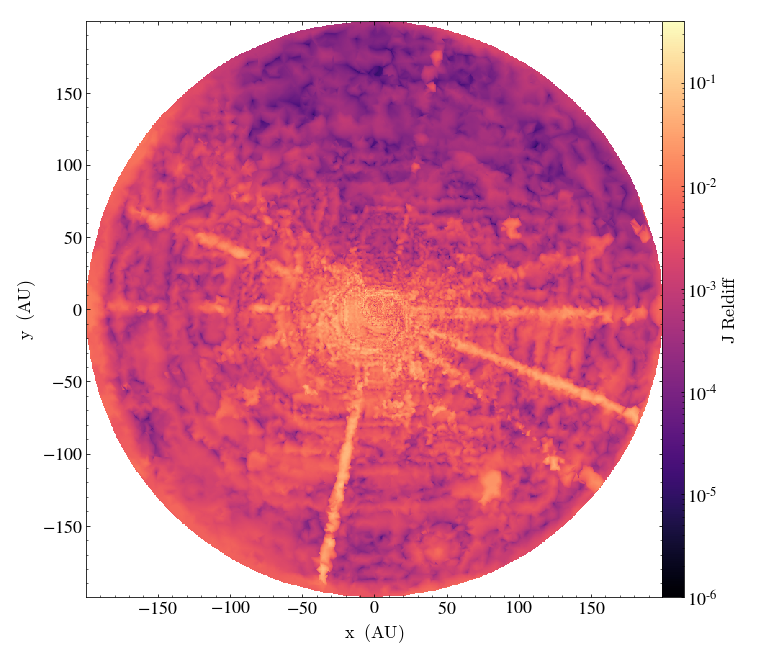

In [28]:
reldiff_original_rec = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_rec_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_rec, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

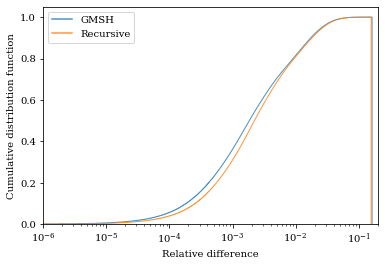

In [29]:
from matplotlib.lines import Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.hist(reldiff_haar_original_grid, cumulative=True, label='Haar', density=True,
#         bins=len(rel_diff_haar), histtype='step', alpha=0.8)
plt.hist(reldiff_gmsh_original_grid, cumulative=True, label='GMSH', density=True,
         bins = len(rel_diff_gmsh), histtype='step', alpha=0.8)
plt.hist(reldiff_rec_original_grid, cumulative=True, label='Recursive', density=True,
         bins = len(rel_diff_rec), histtype='step', alpha=0.8)
plt.xscale('log')
plt.xlim(1e-6,2e-1)
plt.xlabel("Relative difference")
plt.ylabel("Cumulative distribution function")
#plt.legend(loc = "upper left")
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, loc = "upper left")
#plt.title("Relative differences reduced meshes (compared to original grid)")
plt.savefig("relative_difference_plot.pdf")

Testing whether the distributions significantly differ from eachother (with the relatively low-power kolmogorov-smirnov test)

In [30]:
from scipy import stats
stats.ks_2samp(reldiff_gmsh_original_grid, reldiff_rec_original_grid)

KstestResult(statistic=0.052372550758824576, pvalue=0.0, statistic_location=0.0010902368421010509, statistic_sign=1)

So there exist a significant difference between them, as could be expected from the different discretization.